In [1]:
import numpy as np
import networkx as nx
import dimod
import dwave_networkx as dnx

from dimod.binary_quadratic_model import BinaryQuadraticModel
from dwave.system.composites import EmbeddingComposite

import matplotlib.pyplot as plt
# magic word for producing visulizations in notebook
%matplotlib inline
from collections import defaultdict
import itertools
import pandas as pd

from dwave.system.samplers import DWaveSampler

In [2]:
#load dataset
data = pd.read_csv('five_d.txt', sep=',', header=None)

#show data
data

,0,1,2,3,4
0,0.0,3.0,4.0,2.0,7.0
1,3.0,0.0,4.0,6.0,3.0
2,4.0,4.0,0.0,5.0,6.0
3,2.0,6.0,5.0,0.0,6.0
4,7.0,3.0,8.0,6.0,0.0


In [4]:
# distance between two example cities
idx_city1 = 0
idx_city2 = 1
distance = data[idx_city1][idx_city2]
print('Distance between city {} and city {} is {}.'.format(idx_city1, idx_city2, distance))

Distance between city 0 and city 1 is 3.0.


In [5]:
# get number of cities
number_cities = data.shape[0]
print('Total number of cities:', number_cities)

Total number of cities: 5


In [6]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

In [7]:
# G = nx.from_pandas_datafram(data)
G = nx.from_pandas_adjacency(data)
# post = nx.random_layout(G)
pos = nx.spring_layout(G, seed=seed)

# get characteristics of graph
nodes = G.nodes()
edges = G.edges()
weights = nx.get_edge_attributes(G,'weight');


In [8]:
print('Weights of graph:', weights)

Weights of graph: {(0, 1): 3.0, (0, 2): 4.0, (0, 3): 2.0, (0, 4): 7.0, (1, 2): 4.0, (1, 3): 6.0, (1, 4): 3.0, (2, 3): 5.0, (2, 4): 8.0, (3, 4): 6.0}


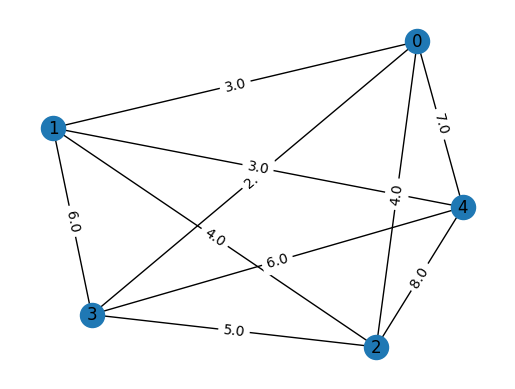

In [15]:
# show graph with weights
plt.axis('off');
nx.draw_networkx(G, pos, with_labels=True);
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights);


In [9]:
# use (Classical) simulated annealing
%time route = dnx.traveling_salesperson(G, dimod.SimulatedAnnealingSampler(), start=0)
print('Route found with simulated annealing:', route)


CPU times: user 3.93 s, sys: 13.4 ms, total: 3.94 s
Wall time: 3.94 s
Route found with simulated annealing: [0, 2, 1, 4, 3]


In [10]:
# use brute force (exhaustive search)
%time exact_route = dnx.traveling_salesperson(G, dimod.ExactSolver(), start=0)
print('Route found with exact solver (brute force):', exact_route)

CPU times: user 1min 19s, sys: 2.01 s, total: 1min 21s
Wall time: 1min 21s
Route found with exact solver (brute force): [0, 3, 4, 1, 2]


In [11]:
# get the total distance
total_dist = 0
for idx, node in enumerate(route[:-1]):
    dist = data[route[idx+1]][route[idx]]
    total_dist += dist

print('Total distance (without return):', total_dist)



Total distance (without return): 17.0


In [14]:
# add distance between start and end point to complete cycle
return_distance = data[route[0]][route[-1]]
print('Distance between start and end:', return_distance)

Distance between start and end: 2.0


In [15]:
# get distance full cycle
distance = total_dist + return_distance
print('Total distance (including return):', distance)



Total distance (including return): 19.0


In [16]:
%time route = dnx.traveling_salesperson(G, EmbeddingComposite(DWaveSampler()), start=0)
print('Route found with D-Wave annealer:', route)

CPU times: user 3 s, sys: 120 ms, total: 3.12 s
Wall time: 4.18 s
Route found with D-Wave annealer: [0, 4, 2, 1, 3]
